# Vax & Cancer rates

### Data import/cleaning, exploratory analyses, dimensionality reduction, and regression model evaluations

#### Betsy Campbell 
#### Group members: Monika Baker, Simone Longo

**References:**<br>

**Ref 1**: https://gis.cdc.gov/Cancer/USCS/DataViz.html <br>
**Ref 2**: https://www.cdc.gov/mmwr/volumes/65/wr/mm6533a4.htm#T3_down <br>
**Ref 3**: https://www.cdc.gov/hpv/parents/cancer.html<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [2]:
#Allowing pandas to display all columns/rows in a dataframe at once
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Import & Clean Data

**Vaccination Data** - Monika pulled from Ref2

In [3]:
#importing previously cleaned vax data
vax_data = pd.read_csv('hpv_clean_w_err.csv')

In [4]:
vax_data.head()

,Unnamed: 0,HHS Region/State/Territory,gte1_Tdap_pct,gte1_MenACWY,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_Tdap_pct_err,gte1_MenACWY_err,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err
0,0,Connecticut,93.7,93.5,70.9,64.3,55.2,65.3,58.2,42.0,3.0,3.1,8.2,8.7,9.1,7.8,8.1,8.3
1,1,Maine,87.7,77.7,66.0,53.9,44.1,65.8,58.7,46.7,4.0,5.3,8.3,8.7,8.6,7.9,8.3,8.4
2,2,Massachusetts,91.2,89.5,73.5,63.0,52.8,63.0,50.9,35.2,4.1,4.4,8.6,9.5,9.7,8.8,9.1,8.5
3,3,New Hampshire,92.4,87.7,74.2,59.7,51.4,69.8,55.1,47.1,3.9,4.4,8.8,10.0,10.0,7.9,9.0,9.1
4,4,Rhode Island,97.1,97.7,87.9,77.9,68.0,80.6,66.6,58.1,1.6,1.5,4.9,6.7,7.4,5.8,7.1,7.4


In [5]:
#dropping unnecessary columns and columns that don't contain HPV data
vax_data = vax_data.drop(columns=['Unnamed: 0','gte1_Tdap_pct','gte1_MenACWY','gte1_Tdap_pct_err','gte1_MenACWY_err'])

In [6]:
#renaming column 
vax_data = vax_data.rename(columns={'HHS Region/State/Territory': 'State'})

In [7]:
#State abbreviation dictionary
state_abbr = {'Alabama':"AL", 'Alaska':"AK",'Arizona': "AZ",'Arkansas': "AR", 'California':"CA",'Colorado': "CO", 
              'Connecticut':"CT", 'District of Columbia':"DC", 'Delaware':"DE",'Florida':"FL", 'Georgia':"GA",
              'Hawaii':"HI",'Idaho':"ID",'Illinois':"IL",'Indiana':"IN", 'Iowa':"IA",'Kansas':"KS", 'Kentucky':"KY", 
              'Louisiana':"LA",'Maine':"ME", 'Maryland':"MD", 'Massachussetts':"MA", 'Michigan':"MI", 'Minnesota':"MN",
              'Mississippi':"MS", 'Missouri':"MO", 'Montana':"MT", 'Nebraska':"NE", 'Nevada':"NV", 'New Hampshire':"NH",
              'New Jersey':"NJ", 'New Mexico':"NM", 'New York':"NY", 'North Carolina':"NC", 'North Dakota':"ND", 
              'Ohio':"OH", 'Oklahoma':"OK", 'Oregon':"OR", 'Pennsylvania':"PA", 'Rhode Island':"RI",'South Carolina':"SC",
              'South Dakota':"SD", 'Tennessee':"TN", 'Texas':"TX", 'Utah':"UT", 'Vermont':"VT", 'Virginia':"VA",
              'Washington':"WA", 'West Virginia':"WV", 'Wisconsin':"WI", 'Wyoming':"WY"}

In [8]:
#Map abbrev to data frame
vax_data['abbrev'] = vax_data['State'].map(state_abbr)

In [9]:
#Drop territories due to incomplete missing data
vax_data = vax_data.drop([51,52,53])

#sort alphabetically
vax_data = vax_data.sort_values(by='State',ascending=True)
vax_data = vax_data.reset_index(drop=True)

In [10]:
vax_data.head()

,State,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err,abbrev
0,Alabama,57.7,50.4,40.8,39.4,30.3,22.6,9.2,9.3,9.3,8.6,8.3,7.9,AL
1,Alaska,57.0,46.3,36.9,41.6,30.3,18.8,8.7,8.7,8.4,8.5,7.8,6.4,AK
2,Arizona,68.3,56.1,44.2,51.3,40.6,27.0,7.4,8.1,8.3,8.2,8.2,7.3,AZ
3,Arkansas,63.5,49.4,34.0,44.2,28.9,16.4,8.4,8.9,8.4,8.1,7.2,5.8,AR
4,California,66.7,59.7,48.4,58.5,41.8,29.5,9.6,9.9,9.9,9.8,9.7,9.0,CA


**Cancer Data** - by sex, by state, all HPV-related cancers, 2016 - pulled from Ref1

In [11]:
#importing female HPV cancer rates for 2016
hpv_fem = pd.read_csv('HPV_all_types_by_state_female_2016.csv', header=0, names=('Type','State','Race','Sex','Rate',
                                                                                 'lci','uci','count','pop'))
#dropping United States total
hpv_fem = hpv_fem.drop([24])

#sorting state alphabetically, resetting index
hpv_fem = hpv_fem.sort_values(by='State',ascending=True)
hpv_fem = hpv_fem.reset_index(drop=True)

#dropping type and race since all values are the same
hpv_fem = hpv_fem.drop(columns=['Type','Race'])

hpv_fem.tail()

,State,Sex,Rate,lci,uci,count,pop
46,Virginia,Female,11.5,10.6,12.6,572,4275622
47,Washington,Female,12.4,11.3,13.6,521,3641693
48,West Virginia,Female,16.4,14.0,19.1,184,924349
49,Wisconsin,Female,13.3,12.0,14.7,440,2901901
50,Wyoming,Female,10.9,7.6,15.3,39,286246


In [12]:
#importing male HPV cancer rates for 2016
hpv_m = pd.read_csv('HPV_all_types_by_state_male_2016.csv', header=0, names=('Type','State','Race','Sex','Rate',
                                                                                 'lci','uci','count','pop'))
#dropping United States total
hpv_m = hpv_m.drop([24])

#sorting state alphabetically, resetting index
hpv_m = hpv_m.sort_values(by='State',ascending=True)
hpv_m = hpv_m.reset_index(drop=True)

#dropping type and race since all values are the same
hpv_m = hpv_m.drop(columns=['Type','Race'])

hpv_m.head()

,State,Sex,Rate,lci,uci,count,pop
0,Alabama,Male,11.6,10.4,13.0,332,2354189
1,Alaska,Male,9.3,6.5,12.8,42,388168
2,Arizona,Male,8.5,7.7,9.5,349,3434258
3,Arkansas,Male,13.7,12.0,15.6,240,1468111
4,California,Male,9.5,9.0,9.9,1986,19522943


In [13]:
#creating a dataframe with all cancer data
all_cancer = pd.merge(hpv_fem, hpv_m, on='State')

In [14]:
all_cancer.head()

,State,Sex_x,Rate_x,lci_x,uci_x,count_x,pop_x,Sex_y,Rate_y,lci_y,uci_y,count_y,pop_y
0,Alabama,Female,15.2,13.7,16.8,427,2506356,Male,11.6,10.4,13.0,332,2354189
1,Alaska,Female,13.3,9.6,17.8,48,353354,Male,9.3,6.5,12.8,42,388168
2,Arizona,Female,10.1,9.1,11.2,397,3474384,Male,8.5,7.7,9.5,349,3434258
3,Arkansas,Female,15.9,14.0,18.0,274,1520120,Male,13.7,12.0,15.6,240,1468111
4,California,Female,12.3,11.8,12.8,2657,19773533,Male,9.5,9.0,9.9,1986,19522943


In [15]:
#creating a dataframe with all of the data
data = pd.merge(vax_data, all_cancer, on='State')

In [16]:
data.head()

,State,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err,abbrev,Sex_x,Rate_x,lci_x,uci_x,count_x,pop_x,Sex_y,Rate_y,lci_y,uci_y,count_y,pop_y
0,Alabama,57.7,50.4,40.8,39.4,30.3,22.6,9.2,9.3,9.3,8.6,8.3,7.9,AL,Female,15.2,13.7,16.8,427,2506356,Male,11.6,10.4,13.0,332,2354189
1,Alaska,57.0,46.3,36.9,41.6,30.3,18.8,8.7,8.7,8.4,8.5,7.8,6.4,AK,Female,13.3,9.6,17.8,48,353354,Male,9.3,6.5,12.8,42,388168
2,Arizona,68.3,56.1,44.2,51.3,40.6,27.0,7.4,8.1,8.3,8.2,8.2,7.3,AZ,Female,10.1,9.1,11.2,397,3474384,Male,8.5,7.7,9.5,349,3434258
3,Arkansas,63.5,49.4,34.0,44.2,28.9,16.4,8.4,8.9,8.4,8.1,7.2,5.8,AR,Female,15.9,14.0,18.0,274,1520120,Male,13.7,12.0,15.6,240,1468111
4,California,66.7,59.7,48.4,58.5,41.8,29.5,9.6,9.9,9.9,9.8,9.7,9.0,CA,Female,12.3,11.8,12.8,2657,19773533,Male,9.5,9.0,9.9,1986,19522943


In [17]:
#adding estimate for total population (probably not that accurate)
data['tot_pop'] = data['pop_x'] + data['pop_y']

In [18]:
data.head()

,State,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err,abbrev,Sex_x,Rate_x,lci_x,uci_x,count_x,pop_x,Sex_y,Rate_y,lci_y,uci_y,count_y,pop_y,tot_pop
0,Alabama,57.7,50.4,40.8,39.4,30.3,22.6,9.2,9.3,9.3,8.6,8.3,7.9,AL,Female,15.2,13.7,16.8,427,2506356,Male,11.6,10.4,13.0,332,2354189,4860545
1,Alaska,57.0,46.3,36.9,41.6,30.3,18.8,8.7,8.7,8.4,8.5,7.8,6.4,AK,Female,13.3,9.6,17.8,48,353354,Male,9.3,6.5,12.8,42,388168,741522
2,Arizona,68.3,56.1,44.2,51.3,40.6,27.0,7.4,8.1,8.3,8.2,8.2,7.3,AZ,Female,10.1,9.1,11.2,397,3474384,Male,8.5,7.7,9.5,349,3434258,6908642
3,Arkansas,63.5,49.4,34.0,44.2,28.9,16.4,8.4,8.9,8.4,8.1,7.2,5.8,AR,Female,15.9,14.0,18.0,274,1520120,Male,13.7,12.0,15.6,240,1468111,2988231
4,California,66.7,59.7,48.4,58.5,41.8,29.5,9.6,9.9,9.9,9.8,9.7,9.0,CA,Female,12.3,11.8,12.8,2657,19773533,Male,9.5,9.0,9.9,1986,19522943,39296476


### Initial Exploratory Analyses

In [19]:
data.describe()

,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err,Rate_x,lci_x,uci_x,count_x,pop_x,Rate_y,lci_y,uci_y,count_y,pop_y,tot_pop
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,63.188235,52.229412,41.896078,50.856863,40.619608,29.613725,8.417647,8.709804,8.562745,8.309804,8.182353,7.556863,13.686275,11.947059,15.678431,502.509804,3.218865e+06,11.017647,9.482353,12.800000,401.549020,3.122428e+06,6.341293e+06
std,7.664272,8.815606,9.003221,10.737509,10.297787,9.222646,1.117445,1.015924,0.999792,0.997247,0.944607,1.063063,2.028302,2.211909,2.251783,549.789428,3.673703e+06,1.594579,1.726465,1.940722,423.807565,3.583985e+06,7.257151e+06
min,47.700000,35.900000,24.400000,34.800000,25.200000,16.000000,4.900000,5.200000,5.000000,4.800000,4.400000,3.800000,9.600000,7.500000,11.200000,39.000000,2.862460e+05,7.300000,5.900000,9.100000,36.000000,2.986640e+05,5.849100e+05
25%,57.900000,43.750000,35.500000,43.450000,32.450000,22.200000,8.000000,8.450000,8.350000,7.950000,7.800000,6.900000,12.300000,10.550000,14.000000,132.000000,8.813480e+05,9.900000,8.500000,11.600000,107.000000,8.729835e+05,1.754332e+06
50%,62.500000,53.300000,40.900000,48.000000,40.100000,27.500000,8.500000,8.900000,8.700000,8.500000,8.300000,7.600000,13.600000,12.100000,15.600000,367.000000,2.251071e+06,10.900000,9.500000,12.600000,305.000000,2.185042e+06,4.436113e+06
75%,67.600000,57.650000,47.550000,58.550000,48.800000,35.950000,9.000000,9.000000,9.100000,8.850000,8.700000,8.300000,15.250000,13.550000,17.250000,580.500000,3.577162e+06,12.400000,10.450000,13.900000,486.000000,3.536750e+06,7.094788e+06
max,87.900000,77.900000,68.000000,80.600000,66.600000,58.100000,11.100000,11.400000,11.000000,10.600000,9.900000,9.300000,19.300000,17.500000,21.100000,2657.000000,1.977353e+07,14.100000,12.800000,17.700000,1986.000000,1.952294e+07,3.929648e+07


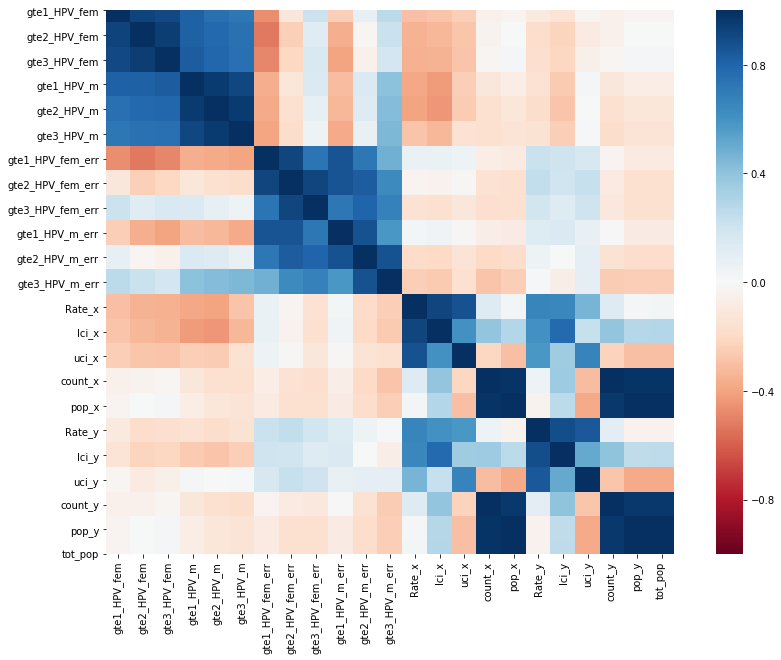

In [20]:
#Correlation matrix for the data
corr = data.corr()

#plotting the correlation matrix as a heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='RdBu', vmin =-1, vmax=1, square=True)
plt.show()

In [21]:
pair_data = data[['gte1_HPV_fem', 'gte2_HPV_fem', 'gte3_HPV_fem', 'gte1_HPV_m',
                  'gte2_HPV_m', 'gte3_HPV_m','Sex_x', 'Rate_x','count_x', 'pop_x', 'Sex_y', 
                  'Rate_y','count_y','pop_y', 'tot_pop']]

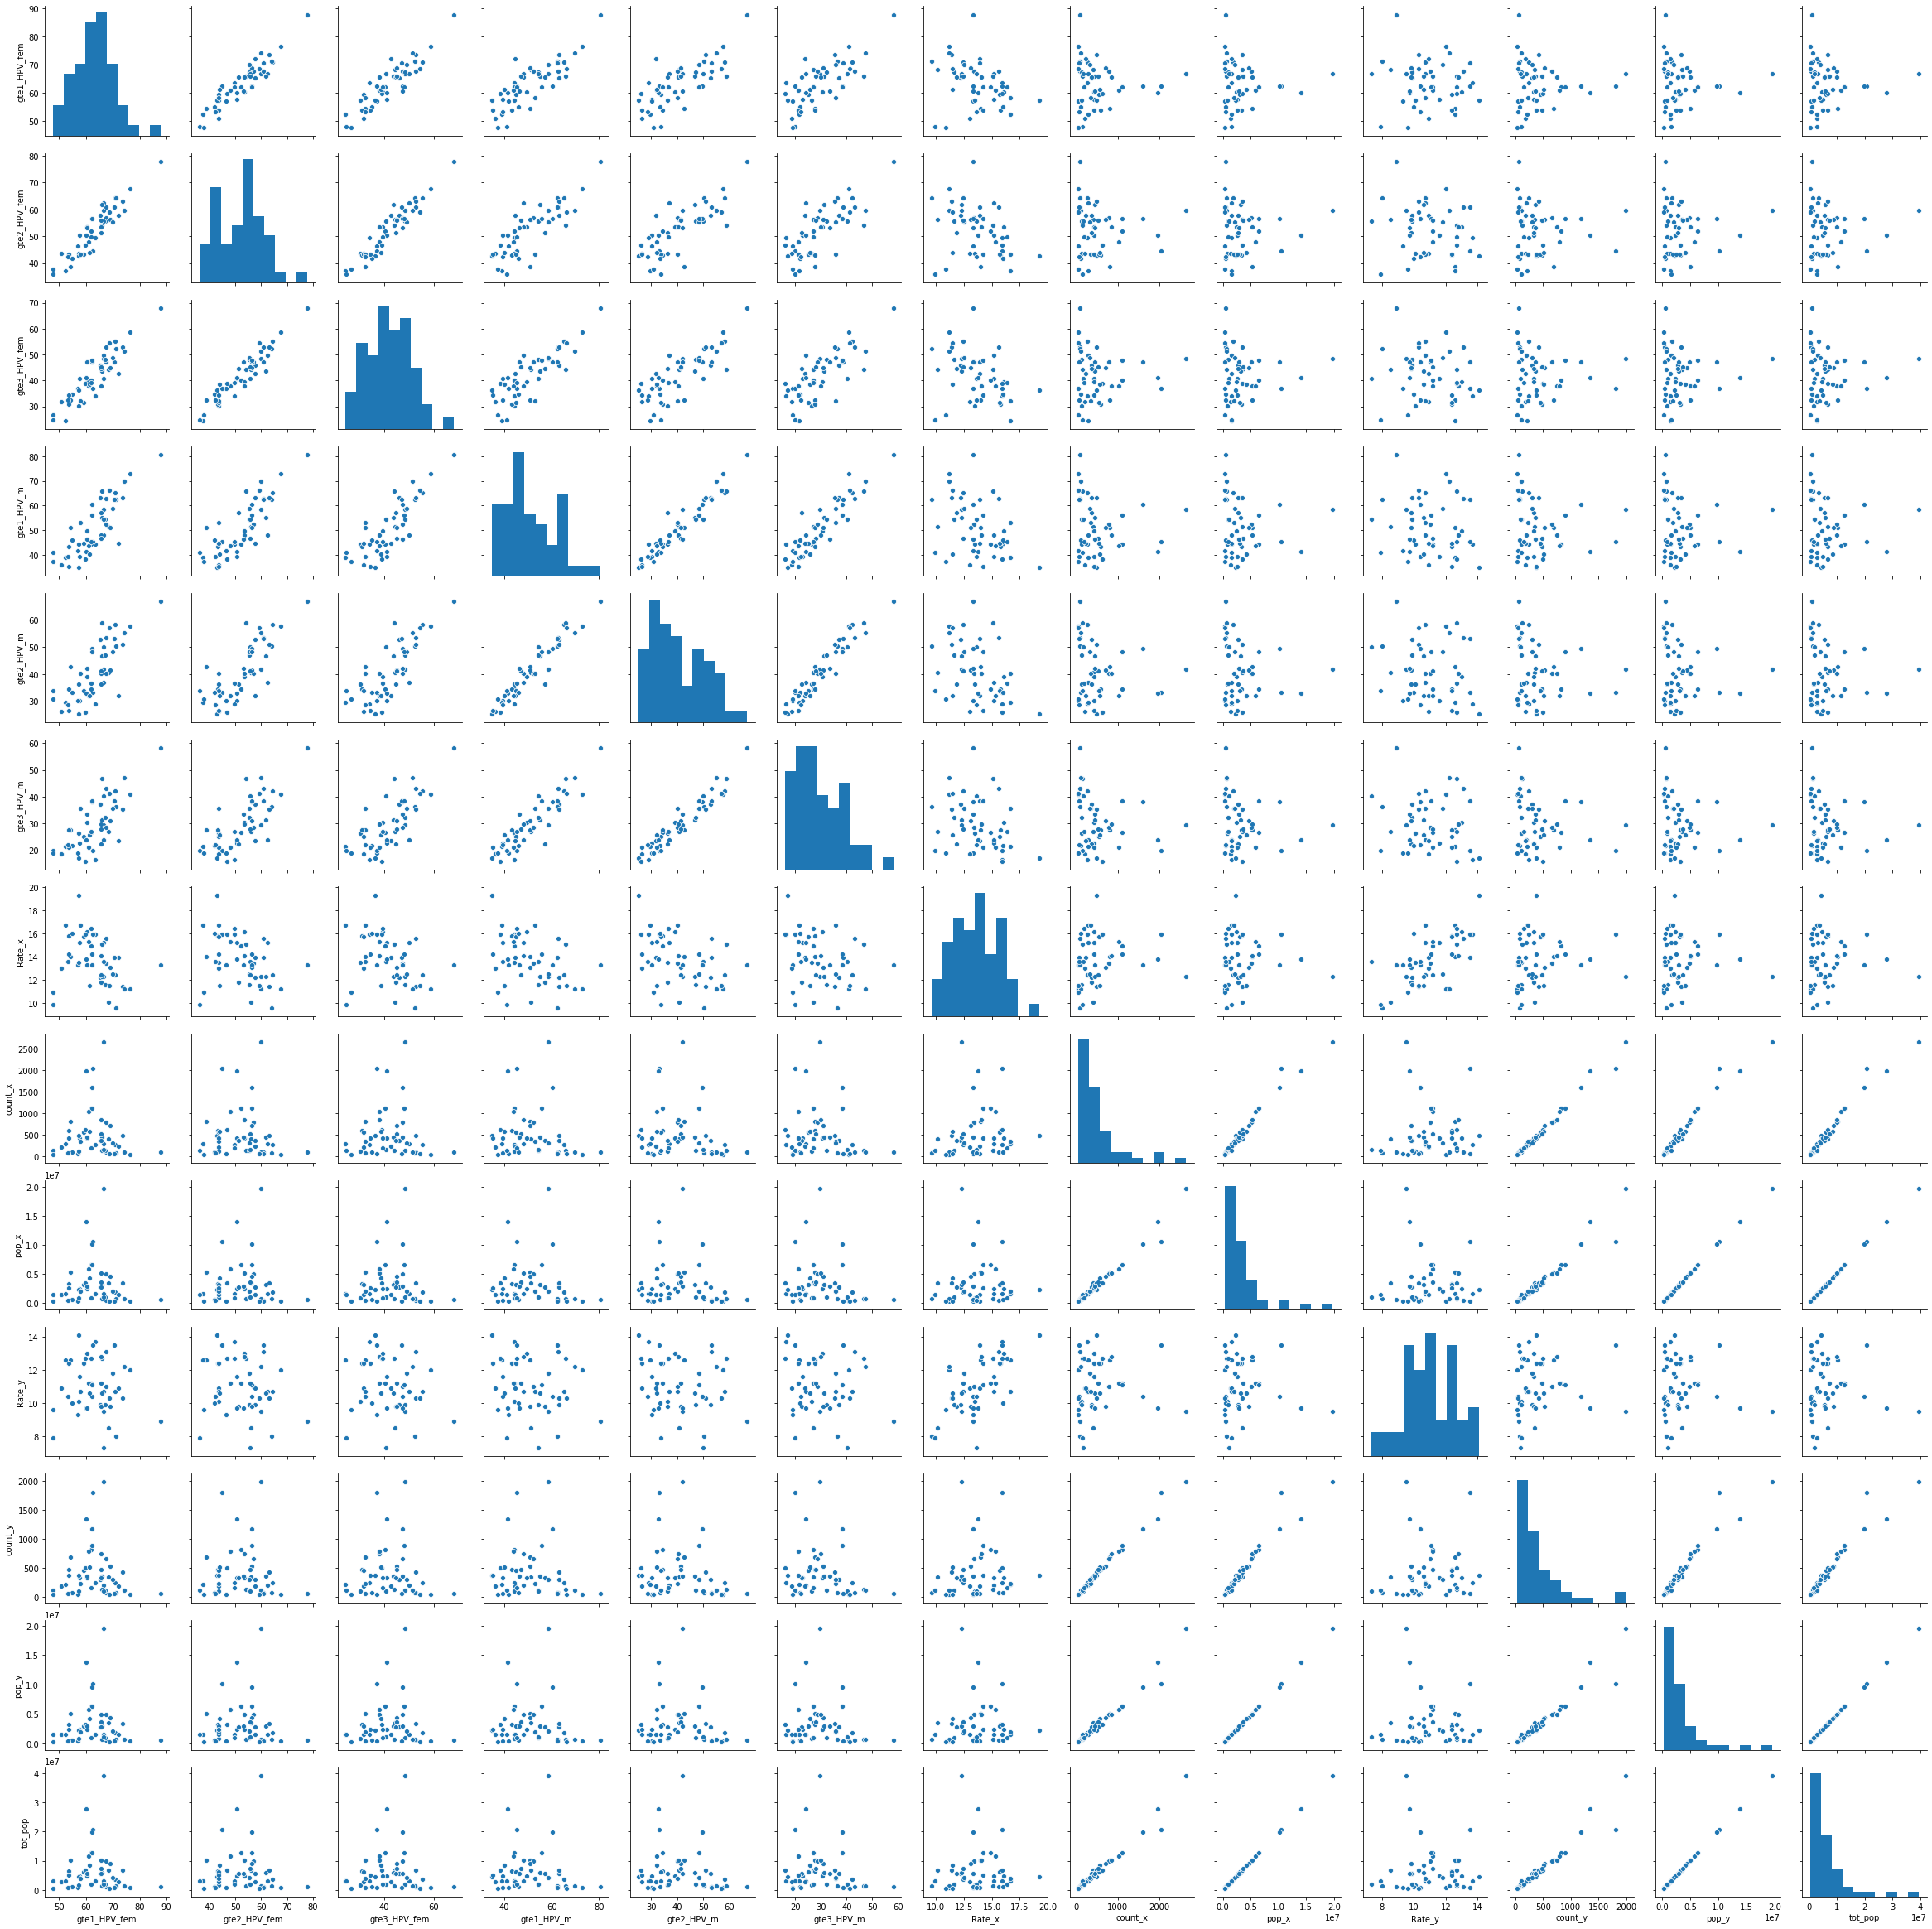

In [22]:
sns.pairplot(pair_data)
plt.show()

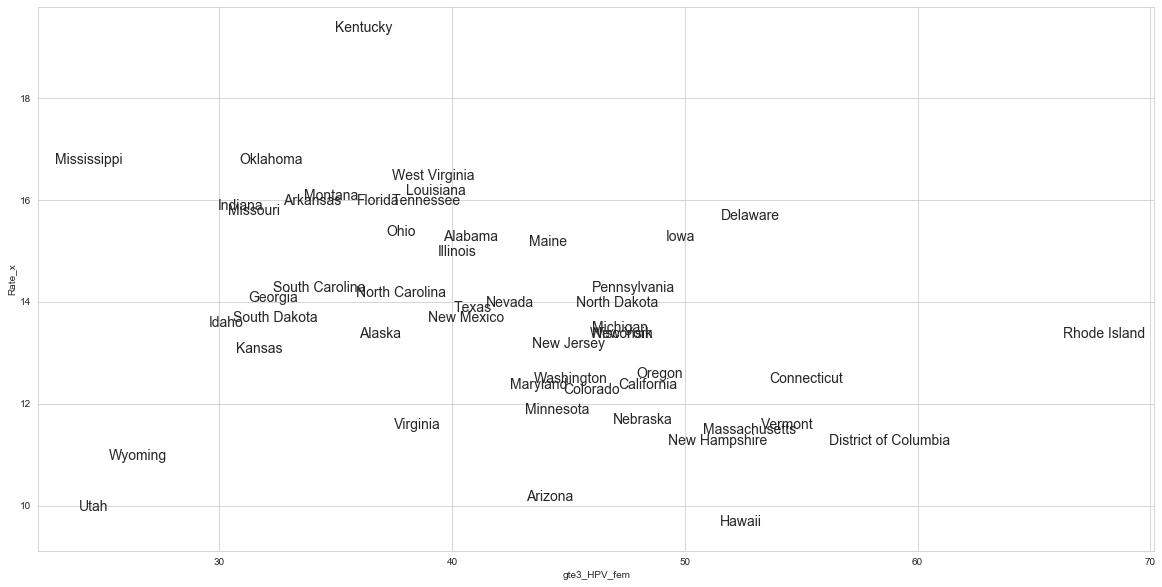

In [23]:
#Rate of completed HPV series vs. rates of HPV-related cancers in females
x = data['gte3_HPV_fem']
y = data['Rate_x']

sns.set_style("whitegrid")

data.plot(x='gte3_HPV_fem', y='Rate_x', kind='scatter', figsize=(20,10), s=0)

states = data['State']

for i, txt in enumerate(states):
    plt.annotate(txt, (x[i], y[i]), ha='center', fontsize=14)
    
plt.show()

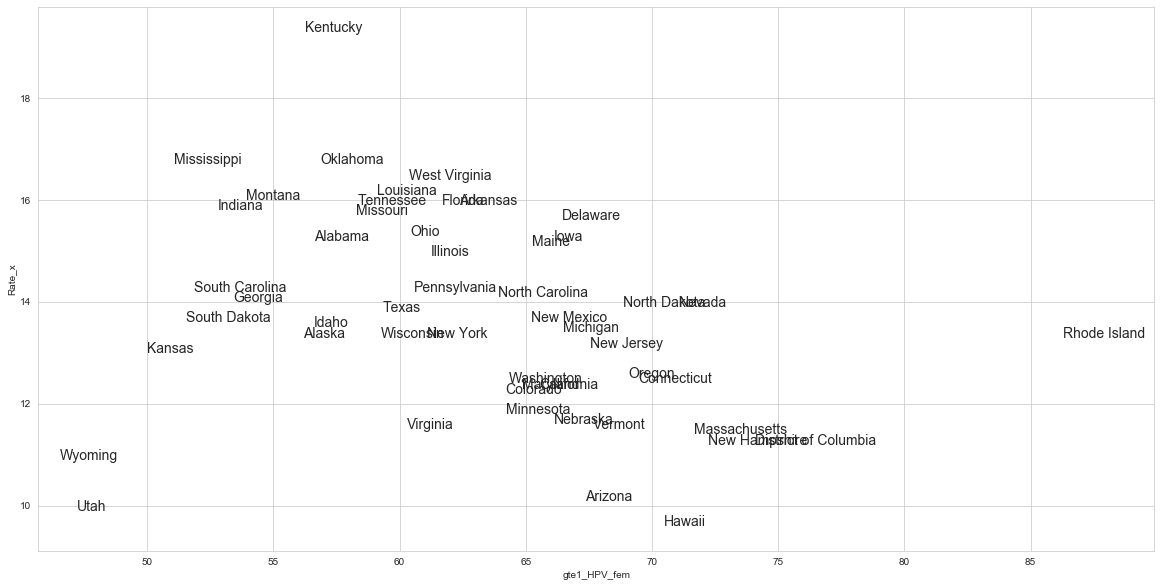

In [24]:
#Rate of first in HPV series vs. rates of HPV-related cancers in females
x = data['gte1_HPV_fem']
y = data['Rate_x']


data.plot(x='gte1_HPV_fem', y='Rate_x', kind='scatter', figsize=(20,10), s=0)

states = data['State']

for i, txt in enumerate(states):
    plt.annotate(txt, (x[i], y[i]), ha='center', fontsize=14)
    
plt.show()

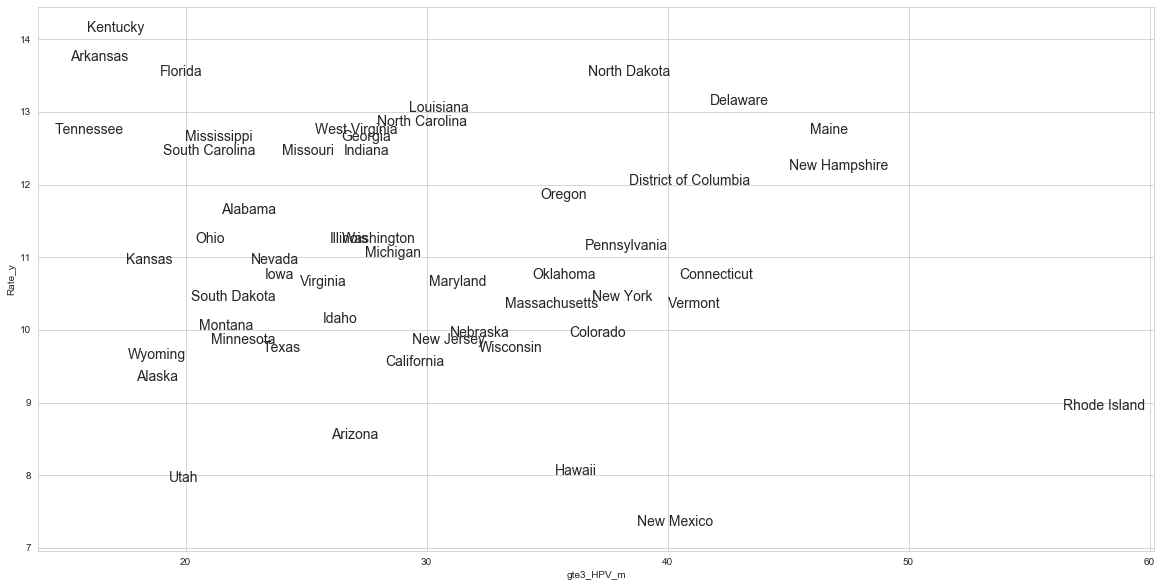

In [25]:
#Rate of completed HPV series vs. rates of HPV-related cancers in females
x = data['gte3_HPV_m']
y = data['Rate_y']


data.plot(x='gte3_HPV_m', y='Rate_y', kind='scatter', figsize=(20,10), s=0)

states = data['State']

for i, txt in enumerate(states):
    plt.annotate(txt, (x[i], y[i]), ha='center', fontsize=14)
    
plt.show()

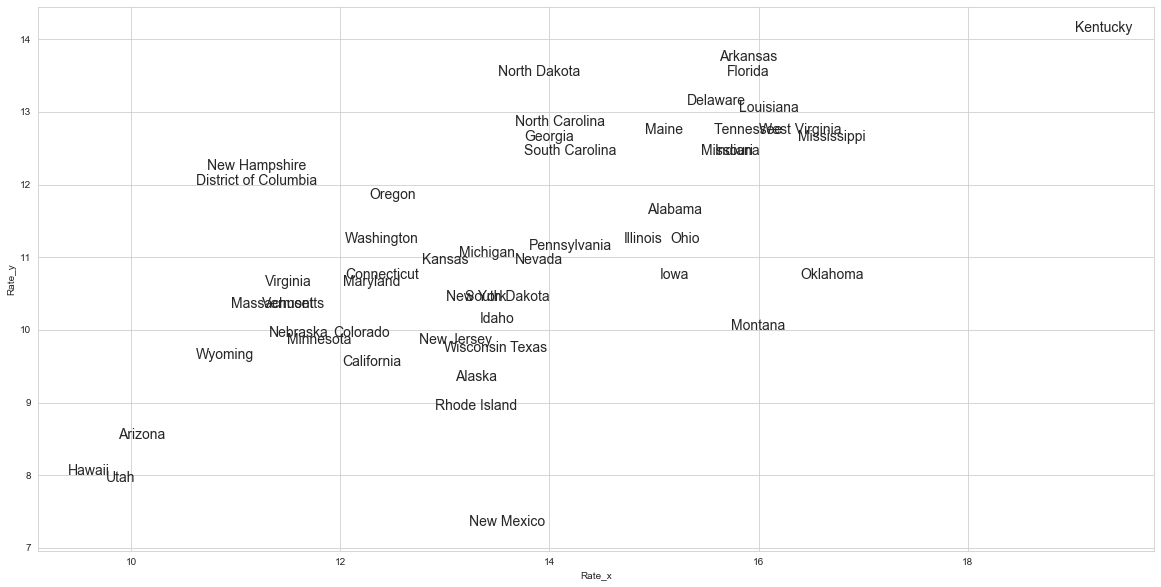

In [26]:
#Rate of male and female HPV-related cancers plotted against each other
x = data['Rate_x']
y = data['Rate_y']


data.plot(x='Rate_x', y='Rate_y', kind='scatter', figsize=(20,10), s=0)

states = data['State']

for i, txt in enumerate(states):
    plt.annotate(txt, (x[i], y[i]), ha='center', fontsize=14)
    
plt.show()

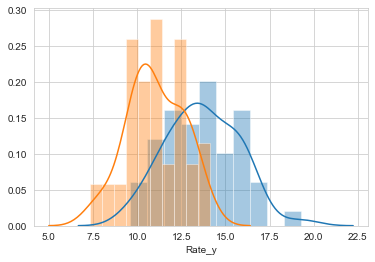

In [27]:
sns.distplot(data['Rate_x'], bins=10)
sns.distplot(data['Rate_y'], bins=10)
plt.show()

In [28]:
#splitting data into male/female
fem_data = data[['gte1_HPV_fem', 'gte2_HPV_fem', 'gte3_HPV_fem','count_x', 'pop_x','tot_pop', 'Rate_x',]]
mal_data = data[['gte1_HPV_m','gte2_HPV_m', 'gte3_HPV_m','count_y','pop_y', 'tot_pop', 'Rate_y']]

In [29]:
fem_data.head()

,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,count_x,pop_x,tot_pop,Rate_x
0,57.7,50.4,40.8,427,2506356,4860545,15.2
1,57.0,46.3,36.9,48,353354,741522,13.3
2,68.3,56.1,44.2,397,3474384,6908642,10.1
3,63.5,49.4,34.0,274,1520120,2988231,15.9
4,66.7,59.7,48.4,2657,19773533,39296476,12.3


In [30]:
mal_data.head()

,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,count_y,pop_y,tot_pop,Rate_y
0,39.4,30.3,22.6,332,2354189,4860545,11.6
1,41.6,30.3,18.8,42,388168,741522,9.3
2,51.3,40.6,27.0,349,3434258,6908642,8.5
3,44.2,28.9,16.4,240,1468111,2988231,13.7
4,58.5,41.8,29.5,1986,19522943,39296476,9.5


## PCA

**PCA Analysis - female data**

In [31]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 

In [32]:
X = scale(fem_data.values)

pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

In [33]:
df_plot = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
df_plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.457593,-0.702729,-0.543828,-0.495962,0.071164,0.014446,0.005500
1,-0.009157,-1.773592,0.468604,-0.188454,-0.027669,-0.029599,-0.003748
2,1.056175,0.690034,1.487616,0.376684,0.057359,-0.069406,0.001057
3,-0.301163,-1.181877,-0.934244,0.543519,0.246747,-0.041775,0.000800
4,-3.518326,6.805952,0.692904,-0.058753,0.227146,-0.361378,-0.006181


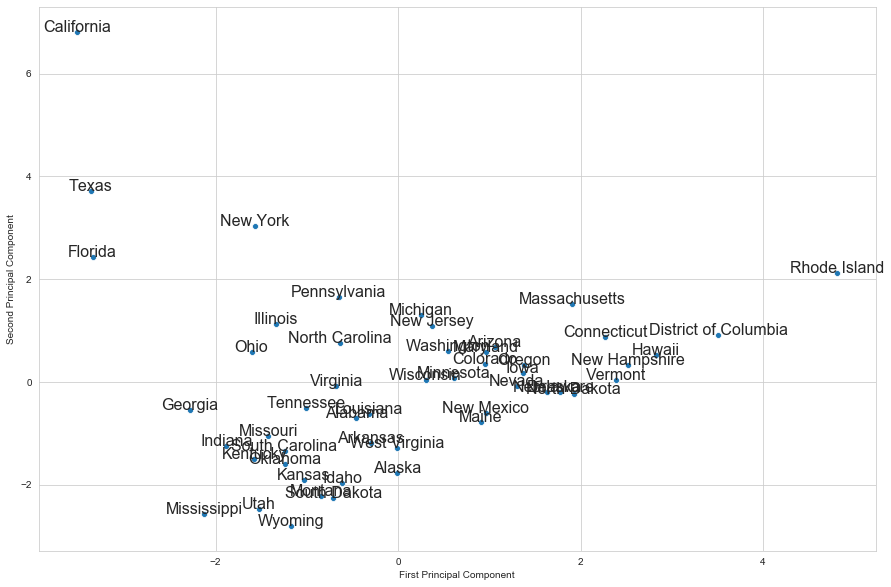

In [34]:
plt.figure(figsize=(15,10))

sns.scatterplot(X_PCA[:,0], X_PCA[:,1])

# Plot Principal Components 1 and 2
for i,state in enumerate(data['State'].values):
    plt.annotate(state, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=16)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

[4.38809080e-01 4.18673251e-01 1.19645161e-01 1.40266393e-02
 6.88944857e-03 1.95136487e-03 5.05597607e-06]


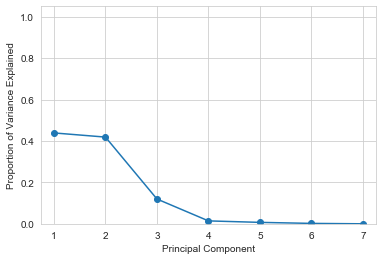

In [35]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot([1,2,3,4,5,6,7], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,7.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7])
plt.show()

In [36]:
#storing PC1 and PC2 in a new dataframe with HPV-related cancer rates
X_redux = df_plot[['PC1','PC2']]
X_redux['Rate_x'] = fem_data['Rate_x'].values
X_redux['State'] = data['State'].values
X_redux.head()

C:\Users\eliza\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eliza\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PC1,PC2,Rate_x,State
0,-0.457593,-0.702729,15.2,Alabama
1,-0.009157,-1.773592,13.3,Alaska
2,1.056175,0.690034,10.1,Arizona
3,-0.301163,-1.181877,15.9,Arkansas
4,-3.518326,6.805952,12.3,California


**PCA Analysis - male data**

In [37]:
X = scale(mal_data.values)

pca_model = PCA()
Y_PCA = pca_model.fit_transform(X)

In [38]:
m_df_plot = pd.DataFrame(Y_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
m_df_plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.915733,-1.459967,-0.115347,-0.204332,-0.037826,0.041449,0.007239
1,0.121028,-2.082064,1.373263,0.257344,0.020543,0.034874,-0.001505
2,-0.020442,0.118251,1.608835,0.223798,0.034206,-0.044847,-0.000962
3,0.883182,-2.046002,-1.379258,0.611864,-0.183498,0.000979,0.001294
4,5.009483,5.660604,0.773678,0.296106,-0.528127,-0.034741,-0.010455


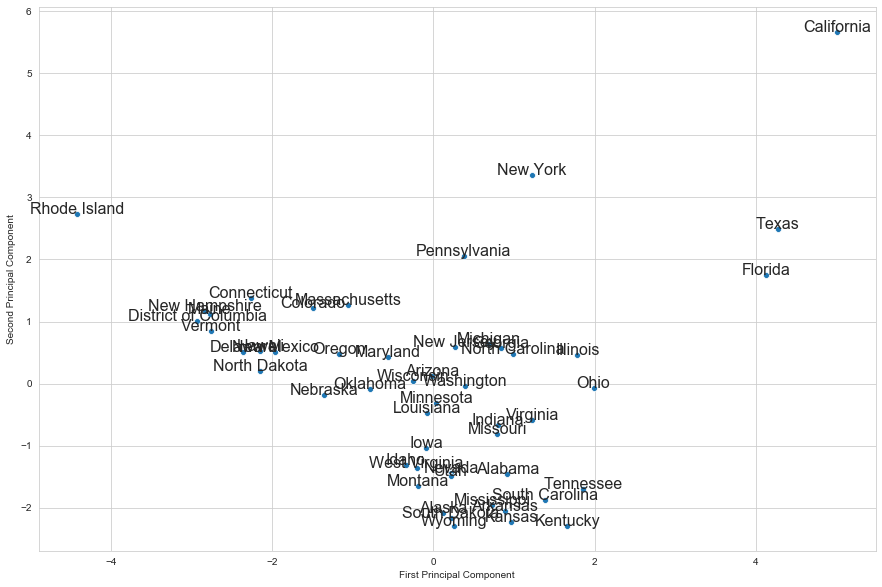

In [39]:
plt.figure(figsize=(15,10))

sns.scatterplot(Y_PCA[:,0], Y_PCA[:,1])

# Plot Principal Components 1 and 2
for i,state in enumerate(data['State'].values):
    plt.annotate(state, (Y_PCA[i,0], Y_PCA[i,1]), ha='center',fontsize=16)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

[4.72400499e-01 3.66859372e-01 1.39046887e-01 1.31026170e-02
 5.22249845e-03 3.36239383e-03 5.73288689e-06]


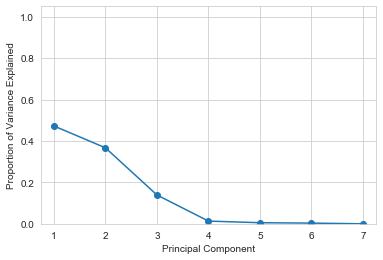

In [40]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot([1,2,3,4,5,6,7], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,7.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7])
plt.show()

In [41]:
#storing PC1 and PC2 in a new dataframe with HPV-related cancer rates
Y_redux = m_df_plot[['PC1','PC2']]
Y_redux['Rate_y'] = mal_data['Rate_y'].values
Y_redux['State'] = data['State'].values
Y_redux.head()

C:\Users\eliza\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eliza\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PC1,PC2,Rate_y,State
0,0.915733,-1.459967,11.6,Alabama
1,0.121028,-2.082064,9.3,Alaska
2,-0.020442,0.118251,8.5,Arizona
3,0.883182,-2.046002,13.7,Arkansas
4,5.009483,5.660604,9.5,California


### Linear Regressions <br>

**Will review the performance of each model for each sex and determine 1-2 models that will move forward to optimization. Other things up for consideration include different dimensionality reduction techniques and potentially bootstrapping to increase the number of data points.**

**Train/Test Split - female data**

In [42]:
#female subset from PCA analysis
X_f = X_redux[['PC1','PC2']].values
y_f = X_redux[['Rate_x']].values

In [43]:
#training/testing split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size = 0.20)

**Train/Test Split - male data**

In [44]:
#male subset from PCA analysis
X_m = Y_redux[['PC1','PC2']].values
y_m = Y_redux[['Rate_y']].values

In [45]:
#training/testing split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size = 0.20)

**Linear Regression - female data**

In [46]:
lr = LinearRegression(normalize=True)
lr.fit(X_train_f, y_train_f[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [47]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print(lr.coef_)

13.696666720039584
[-0.64201722 -0.40926296]


In [48]:
lr_y_pred = lr.predict(X_test_f)

In [49]:
lr_comp_df = pd.DataFrame({'Actual': y_test_f.flatten(), 'Predicted': lr_y_pred.flatten(), 
                        'Difference': y_test_f.flatten()-lr_y_pred.flatten()})
lr_comp_df

,Actual,Predicted,Difference
0,12.2,12.944108,-0.744108
1,13.3,9.737149,3.562851
2,15.2,14.278050,0.921950
3,10.9,15.597103,-4.697103
4,15.7,15.045075,0.654925
5,13.9,12.561207,1.338793
6,13.4,13.004618,0.395382
7,14.9,14.093706,0.806294
8,11.5,14.164901,-2.664901
9,13.1,13.014610,0.085390


In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_f, lr_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_f, lr_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_f, lr_y_pred)))

Mean Absolute Error: 1.4601065576586996
Mean Squared Error: 4.2120901979699035
Root Mean Squared Error: 2.0523377397421467


**Linear Regression - male data**

In [51]:
lr = LinearRegression(normalize=True)
lr.fit(X_train_m, y_train_m[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [52]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print(lr.coef_)

10.971644449179825
[ 0.24117173 -0.1960491 ]


In [53]:
lr_y_pred = lr.predict(X_test_m)

In [54]:
lr_comp_df = pd.DataFrame({'Actual': y_test_m.flatten(), 'Predicted': lr_y_pred.flatten(), 
                        'Difference': y_test_m.flatten()-lr_y_pred.flatten()})
lr_comp_df

,Actual,Predicted,Difference
0,10.3,10.140373,0.159627
1,10.7,11.151481,-0.451481
2,10.0,11.251518,-1.251518
3,9.5,11.070034,-1.570034
4,11.1,10.659889,0.440111
5,13.1,10.304398,2.795602
6,12.8,11.114766,1.685234
7,12.0,10.066008,1.933992
8,10.4,11.449190,-1.049190
9,9.9,10.371553,-0.471553


In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_m, lr_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_m, lr_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_m, lr_y_pred)))

Mean Absolute Error: 1.0848804737940154
Mean Squared Error: 1.8353562458822272
Root Mean Squared Error: 1.3547532047875832


**Multilinear Perceptron Regression - female data**

In [56]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(1,6), activation= 'logistic', verbose=0, random_state=2, solver='lbfgs')

In [57]:
mlp_reg.fit(X_train_f, y_train_f.ravel())

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1, 6), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
mlp_y_pred = mlp_reg.predict(X_test_f)

In [59]:
mlp_comp_df = pd.DataFrame({'Actual': y_test_f.flatten(), 'Predicted': mlp_y_pred.flatten(),
                       'Difference': y_test_f.flatten()-mlp_y_pred.flatten()})
mlp_comp_df

,Actual,Predicted,Difference
0,12.2,13.117292,-0.917292
1,13.3,10.966987,2.333013
2,15.2,14.950082,0.249918
3,10.9,15.073354,-4.173354
4,15.7,15.056715,0.643285
5,13.9,12.606137,1.293863
6,13.4,12.878327,0.521673
7,14.9,14.679496,0.220504
8,11.5,14.866509,-3.366509
9,13.1,12.975521,0.124479


In [60]:
print(mlp_reg.score(X_test_f, y_test_f))

-0.7109311695332279


In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_f, mlp_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_f, mlp_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_f, mlp_y_pred)))

Mean Absolute Error: 1.3434290398300537
Mean Squared Error: 3.4902995858477848
Root Mean Squared Error: 1.8682343498201142


**Multilinear Perceptron Regression - male data**

In [62]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(1,6), activation= 'logistic', verbose=0, random_state=2, solver='lbfgs')

In [63]:
mlp_reg.fit(X_train_m, y_train_m.ravel())

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1, 6), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
mlp_y_pred = mlp_reg.predict(X_test_m)

In [65]:
mlp_comp_df = pd.DataFrame({'Actual': y_test_m.flatten(), 'Predicted': mlp_y_pred.flatten(),
                       'Difference': y_test_m.flatten()-mlp_y_pred.flatten()})
mlp_comp_df

,Actual,Predicted,Difference
0,10.3,10.363233,-0.063233
1,10.7,10.363233,0.336767
2,10.0,10.363233,-0.363233
3,9.5,12.027511,-2.527511
4,11.1,10.363233,0.736767
5,13.1,10.363233,2.736767
6,12.8,12.405685,0.394315
7,12.0,10.363233,1.636767
8,10.4,10.368761,0.031239
9,9.9,10.363233,-0.463233


In [66]:
print(mlp_reg.score(X_test_m, y_test_m))

-0.30642328075981795


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_m, mlp_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_m, mlp_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_m, mlp_y_pred)))

Mean Absolute Error: 0.9205977131599706
Mean Squared Error: 1.6745971144284937
Root Mean Squared Error: 1.294062252918496


**Linear SVR - female data**

In [68]:
from sklearn.svm import LinearSVR

In [69]:
svm_reg = LinearSVR(epsilon= 0.5, max_iter= 2500)
svm_reg.fit(X_train_f, y_train_f.ravel())

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=2500,
          random_state=None, tol=0.0001, verbose=0)

In [70]:
svm_y_pred = svm_reg.predict(X_test_f)

In [71]:
svm_comp_df = pd.DataFrame({'Actual': y_test_f.flatten(), 'Predicted': svm_y_pred.flatten(),
                       'Difference': y_test_f.flatten()-svm_y_pred.flatten()})
svm_comp_df

,Actual,Predicted,Difference
0,12.2,12.256029,-0.056029
1,13.3,9.288620,4.011380
2,15.2,13.474479,1.725521
3,10.9,14.625712,-3.725712
4,15.7,14.187723,1.512277
5,13.9,11.860979,2.039021
6,13.4,12.362310,1.037690
7,14.9,13.391904,1.508096
8,11.5,13.398348,-1.898348
9,13.1,12.361102,0.738898


In [72]:
print(svm_reg.score(X_test_f, y_test_f))

-1.1029231432666955


In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_f, svm_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_f, svm_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_f, svm_y_pred)))

Mean Absolute Error: 1.7084432767510138
Mean Squared Error: 4.289963212264058
Root Mean Squared Error: 2.0712226370586184


**Linear SVR - male data**

In [74]:
svm_reg = LinearSVR(epsilon= 0.5, max_iter= 2500)
svm_reg.fit(X_train_m, y_train_m.ravel())

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=2500,
          random_state=None, tol=0.0001, verbose=0)

In [75]:
svm_y_pred = svm_reg.predict(X_test_m)

In [76]:
svm_comp_df = pd.DataFrame({'Actual': y_test_m.flatten(), 'Predicted': svm_y_pred.flatten(),
                       'Difference': y_test_m.flatten()-svm_y_pred.flatten()})
svm_comp_df

,Actual,Predicted,Difference
0,10.3,9.353668,0.946332
1,10.7,10.603010,0.096990
2,10.0,10.730714,-0.730714
3,9.5,10.441595,-0.941595
4,11.1,9.975437,1.124563
5,13.1,9.556686,3.543314
6,12.8,10.544195,2.255805
7,12.0,9.261519,2.738481
8,10.4,10.976342,-0.576342
9,9.9,9.631854,0.268146


In [77]:
print(svm_reg.score(X_test_m, y_test_m))

-1.1011970746426698


In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_m, svm_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_m, svm_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_m, svm_y_pred)))

Mean Absolute Error: 1.2656399398913754
Mean Squared Error: 2.6933526138601493
Root Mean Squared Error: 1.641143690802286


**Elastic Net Regression - female data**

In [79]:
from sklearn.linear_model import ElasticNet

In [80]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio= 0.5)
elastic_net.fit(X_train_f, y_train_f)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
en_y_pred = elastic_net.predict(X_test_f)

In [82]:
en_comp_df = pd.DataFrame({'Actual': y_test_f.flatten(), 'Predicted': en_y_pred.flatten(),
                       'Difference': y_test_f.flatten()-en_y_pred.flatten()})
en_comp_df

,Actual,Predicted,Difference
0,12.2,12.983674,-0.783674
1,13.3,9.933028,3.366972
2,15.2,14.250811,0.949189
3,10.9,15.497766,-4.597766
4,15.7,14.980846,0.719154
5,13.9,12.614846,1.285154
6,13.4,13.046899,0.353101
7,14.9,14.085365,0.814635
8,11.5,14.146395,-2.646395
9,13.1,13.055227,0.044773


In [83]:
print(elastic_net.score(X_test_f, y_test_f))

-0.9605411094346412


In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_f, en_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_f, en_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_f, en_y_pred)))

Mean Absolute Error: 1.4330189237560516
Mean Squared Error: 3.9995038632466677
Root Mean Squared Error: 1.9998759619653084


**Elastic Net Regression - male data**

In [85]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio= 0.5)
elastic_net.fit(X_train_m, y_train_m)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
en_y_pred = elastic_net.predict(X_test_m)

In [87]:
en_comp_df = pd.DataFrame({'Actual': y_test_m.flatten(), 'Predicted': en_y_pred.flatten(),
                       'Difference': y_test_m.flatten()-en_y_pred.flatten()})
en_comp_df

,Actual,Predicted,Difference
0,10.3,10.211962,0.088038
1,10.7,11.133014,-0.433014
2,10.0,11.219173,-1.219173
3,9.5,11.132537,-1.632537
4,11.1,10.709649,0.390351
5,13.1,10.360958,2.739042
6,12.8,11.115881,1.684119
7,12.0,10.144540,1.855460
8,10.4,11.397563,-0.997563
9,9.9,10.431604,-0.531604


In [88]:
print(elastic_net.score(X_test_m, y_test_m))

-0.38826263961892327


In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_m, en_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_m, en_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_m, en_y_pred)))

Mean Absolute Error: 1.063486827278972
Mean Squared Error: 1.779500292602438
Root Mean Squared Error: 1.3339791200024227
